In [1]:
import random

import bamt.preprocessors
import bamt.networks as Nets
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer
from itertools import product
from pgmpy.estimators import  K2Score
import numpy as np
import seaborn as sns
import importlib
import matplotlib.pyplot as plt

from auxiliary.auxiliary import *

plt.rcParams.update({'font.size': 14})

imagespath = 'C:/Users/Acer/PycharmProjects/BAMTclone/BAMT/experiments2/images2'

In [2]:
from bamt.networks.discrete_bn import DiscreteBN

In [3]:
DiscreteBN()

In [2]:
#importlib.reload(bamt)

In [3]:
n = 2000
np.random.seed(42)
data = pd.DataFrame(data=np.random.beta(0.95, 0.5, size=n)*6-3, columns=['origin1'])
data['origin2'] = np.random.beta(0.4,1, size=n)*2
data['cubed'] = data['origin1']**3/50 + np.random.normal(scale=0.1, size=n)
data['negative_root3'] = -np.sign(data['origin2'])*np.power(np.abs(data['origin2']), 1/3) + np.random.normal(scale=0.1, size=n)
data['hyperbola'] = 1./(data['origin1']+4) + np.random.normal(scale=0.3, size=n)
data['combined'] = data['cubed'] + data['negative_root3']
data['marker'] = 0

mask1 = data['combined']>1.5
mask2 = data['combined']<=-0.7
mask3 = (~mask1) & (~mask2)

data.loc[data[mask1].index, 'marker'] = np.random.choice([0, 1, 2], size=data[mask1].shape[0], p=[0.8, 0.1, 0.1])
data.loc[data[mask2].index, 'marker'] = np.random.choice([0, 1, 2], size=data[mask2].shape[0], p=[0.05, 0.15, 0.8])
data.loc[data[mask3].index, 'marker'] = np.random.choice([0, 1, 2], size=data[mask3].shape[0], p=[0.1, 0.7, 0.2])
data.head(10)

,origin1,origin2,cubed,negative_root3,hyperbola,combined,marker
0,2.119492,0.737207,0.174883,-0.794917,0.118959,-0.620034,1
1,-2.625095,0.031537,-0.477368,-0.337130,0.461323,-0.814498,2
2,-2.894855,0.009888,-0.505449,-0.261298,0.660181,-0.766747,1
3,2.688882,0.292918,0.486818,-0.737814,0.044543,-0.250996,1
4,1.990172,0.243591,0.188168,-0.630120,0.361815,-0.441953,0
5,0.055618,1.007663,0.114813,-1.010407,0.143756,-0.895594,2
6,1.978326,1.391204,0.189030,-1.095673,0.490799,-0.906644,2
7,2.810375,0.138295,0.314106,-0.530062,-0.152493,-0.215957,1
8,1.026379,0.008179,-0.230460,-0.214845,-0.176626,-0.445304,2
9,-0.542534,0.038656,0.011687,-0.415791,0.867133,-0.404104,1


In [4]:
data.dtypes

origin1           float64
origin2           float64
cubed             float64
negative_root3    float64
hyperbola         float64
combined          float64
marker              int64
dtype: object

<AxesSubplot: xlabel='origin1', ylabel='Count'>

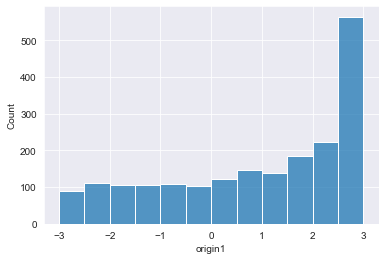

In [5]:
sns.histplot(data['origin1'])

<AxesSubplot: xlabel='origin2', ylabel='Count'>

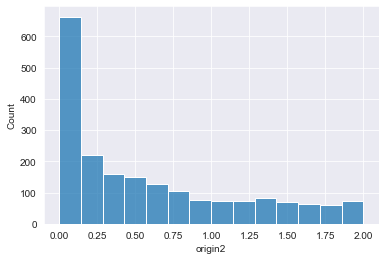

In [6]:
sns.histplot(data['origin2'])

In [7]:
qresult = construct_by_quantiles(data, ['marker'])
uresult = construct_by_uniform(data, ['marker'])
kresult = construct_by_kmeans(data, ['marker'])
kbn = kresult['bn']

c=kbn.plot2(imagespath , "kbn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})
#c=kbn.plot2("visualization_results" , "k_before1.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})
#c=kbn.plot2("visualization_results_new" , "k_after1.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


![](images/kbn16.png)

In [8]:
kencoder, data_kdiscretized_enc = kresult['encoder'], kresult['disc_data']

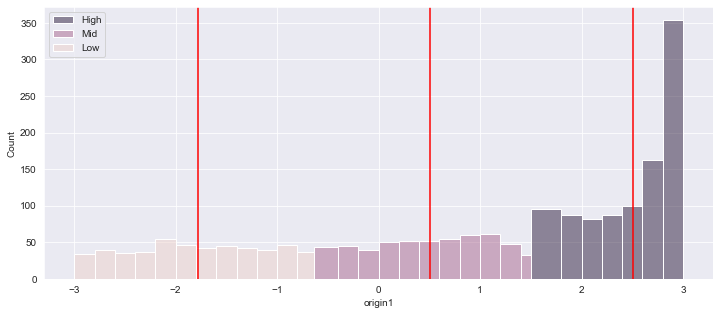

In [9]:
print_histogram('origin1', data, data_kdiscretized_enc, kencoder)

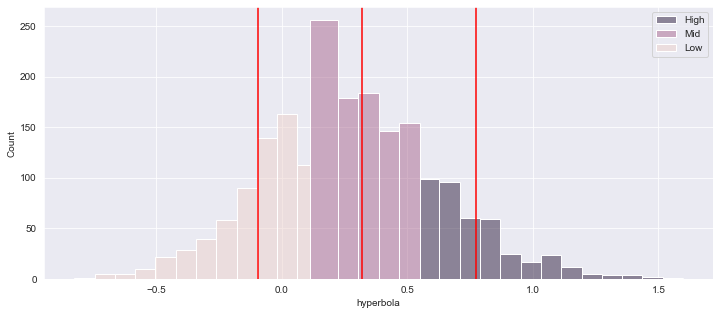

In [10]:
print_histogram('hyperbola', data, data_kdiscretized_enc, kencoder)

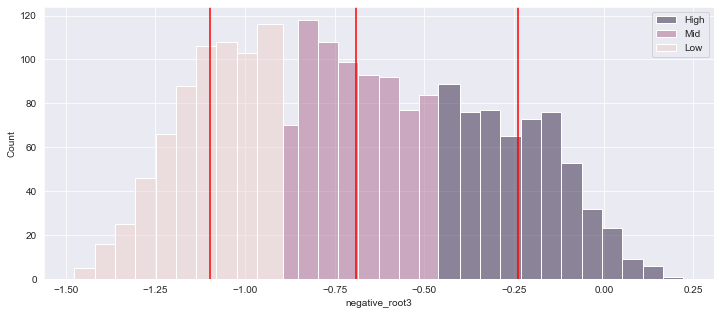

In [11]:
print_histogram('negative_root3', data, data_kdiscretized_enc, kencoder)

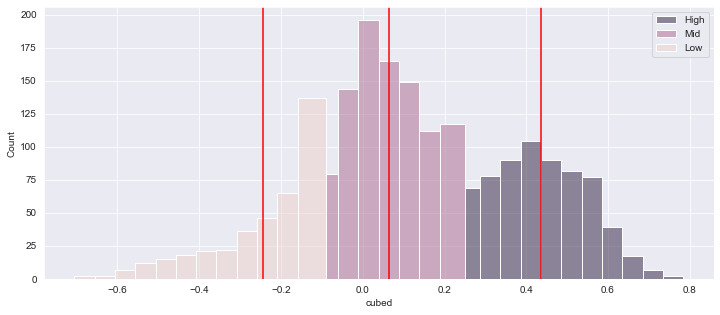

In [12]:
print_histogram('cubed', data, data_kdiscretized_enc, kencoder)

In [13]:
c=kbn.plot_for_specific_nodes(['marker0', 'marker1', 'marker2'], imagespath , "subkbn16.html", custom_mapper={'marker': {0: 'Zero', 1: 'One', 2: 'Two'}})

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [14]:
relationships = [['origin1', 'cubed', 1],
                 ['origin2', 'negative_root3', -1],
                 ['origin1', 'hyperbola', -1],
                 ['origin1', 'combined', 1],
                 ['origin2', 'combined', -1],
                 ['negative_root3', 'combined', 1],
                 ['cubed', 'combined', 1]]

true_edges = list()
states=[0,1,2]
for rel in relationships:
    true_edges+=([[rel[0]+str(i), rel[1]+str(j)] for i, j in zip(states, states[::rel[2]])])
true_edges

[['origin10', 'cubed0'],
 ['origin11', 'cubed1'],
 ['origin12', 'cubed2'],
 ['origin20', 'negative_root32'],
 ['origin21', 'negative_root31'],
 ['origin22', 'negative_root30'],
 ['origin10', 'hyperbola2'],
 ['origin11', 'hyperbola1'],
 ['origin12', 'hyperbola0'],
 ['origin10', 'combined0'],
 ['origin11', 'combined1'],
 ['origin12', 'combined2'],
 ['origin20', 'combined2'],
 ['origin21', 'combined1'],
 ['origin22', 'combined0'],
 ['negative_root30', 'combined0'],
 ['negative_root31', 'combined1'],
 ['negative_root32', 'combined2'],
 ['cubed0', 'combined0'],
 ['cubed1', 'combined1'],
 ['cubed2', 'combined2']]

In [15]:
calculate_ratio(uresult['bn'].edges, true_edges), calculate_reversed_ratio(uresult['bn'].edges, true_edges)

(0.5714285714285714, 0.23809523809523808)

In [16]:
calculate_ratio(qresult['bn'].edges, true_edges), calculate_reversed_ratio(qresult['bn'].edges, true_edges)

(0.5238095238095238, 0.19047619047619047)

In [17]:
calculate_ratio(kbn.edges, true_edges), calculate_reversed_ratio(kbn.edges, true_edges)

(0.6190476190476191, 0.14285714285714285)

Эксперименты с зашумлением

In [18]:
noising_standard(true_edges, qresult, data, construct_by_quantiles, force_normal_noise)

Noising of true edge ['origin10', 'cubed0']`s in-node the edge occured in 80.0% of cases 
Noising of true edge ['origin11', 'cubed1']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin12', 'cubed2']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin20', 'negative_root32']`s in-node the edge occured in 95.0% of cases 
Noising of true edge ['origin21', 'negative_root31']`s in-node the edge occured in 40.0% of cases 
Noising of true edge ['origin22', 'negative_root30']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin10', 'hyperbola2']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin11', 'hyperbola1']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin12', 'hyperbola0']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin10', 'combined0']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin11', 'combined1']`s in-node the ed

In [19]:
noising_standard(true_edges, uresult, data, construct_by_uniform, force_normal_noise)

Noising of true edge ['origin10', 'cubed0']`s in-node the edge occured in 45.0% of cases 
Noising of true edge ['origin11', 'cubed1']`s in-node the edge occured in 90.0% of cases 
Noising of true edge ['origin12', 'cubed2']`s in-node the edge occured in 25.0% of cases 
Noising of true edge ['origin20', 'negative_root32']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin21', 'negative_root31']`s in-node the edge occured in 5.0% of cases 
Noising of true edge ['origin22', 'negative_root30']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin10', 'hyperbola2']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin11', 'hyperbola1']`s in-node the edge occured in 5.0% of cases 
Noising of true edge ['origin12', 'hyperbola0']`s in-node the edge occured in 85.0% of cases 
Noising of true edge ['origin10', 'combined0']`s in-node the edge occured in 5.0% of cases 
Noising of true edge ['origin11', 'combined1']`s in-node the

In [20]:
noising_standard(true_edges, kresult, data, construct_by_kmeans, force_normal_noise)

Noising of true edge ['origin10', 'cubed0']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin11', 'cubed1']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin12', 'cubed2']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin20', 'negative_root32']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin21', 'negative_root31']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin22', 'negative_root30']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin10', 'hyperbola2']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin11', 'hyperbola1']`s in-node the edge occured in 15.0% of cases 
Noising of true edge ['origin12', 'hyperbola0']`s in-node the edge occured in 95.0% of cases 
Noising of true edge ['origin10', 'combined0']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin11', 'combined1']`s in-node

In [21]:
noising_standard(true_edges, qresult, data, construct_by_quantiles, force_uniform_noise)

Noising of true edge ['origin10', 'cubed0']`s in-node the edge occured in 75.0% of cases 
Noising of true edge ['origin11', 'cubed1']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin12', 'cubed2']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin20', 'negative_root32']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin21', 'negative_root31']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin22', 'negative_root30']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin10', 'hyperbola2']`s in-node the edge occured in 95.0% of cases 
Noising of true edge ['origin11', 'hyperbola1']`s in-node the edge occured in 5.0% of cases 
Noising of true edge ['origin12', 'hyperbola0']`s in-node the edge occured in 50.0% of cases 
Noising of true edge ['origin10', 'combined0']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin11', 'combined1']`s in-node the ed

In [22]:
noising_standard(true_edges, uresult, data, construct_by_uniform, force_uniform_noise)

Noising of true edge ['origin10', 'cubed0']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin11', 'cubed1']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin12', 'cubed2']`s in-node the edge occured in 15.0% of cases 
Noising of true edge ['origin20', 'negative_root32']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin21', 'negative_root31']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin22', 'negative_root30']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin10', 'hyperbola2']`s in-node the edge occured in 30.0% of cases 
Noising of true edge ['origin11', 'hyperbola1']`s in-node the edge occured in 15.0% of cases 
Noising of true edge ['origin12', 'hyperbola0']`s in-node the edge occured in 65.0% of cases 
Noising of true edge ['origin10', 'combined0']`s in-node the edge occured in 45.0% of cases 
Noising of true edge ['origin11', 'combined1']`s in-node th

In [23]:
noising_standard(true_edges, kresult, data, construct_by_kmeans, force_uniform_noise)

Noising of true edge ['origin10', 'cubed0']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin11', 'cubed1']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin12', 'cubed2']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin20', 'negative_root32']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin21', 'negative_root31']`s in-node the edge occured in 15.0% of cases 
Noising of true edge ['origin22', 'negative_root30']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin10', 'hyperbola2']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin11', 'hyperbola1']`s in-node the edge occured in 20.0% of cases 
Noising of true edge ['origin12', 'hyperbola0']`s in-node the edge occured in 100.0% of cases 
Noising of true edge ['origin10', 'combined0']`s in-node the edge occured in 0.0% of cases 
Noising of true edge ['origin11', 'combined1']`s in-node t

In [24]:
def noising_impute(true_edges, bn_result, data, construct_func, force_dist):
    np.random.seed(42)

    blacklist = create_blacklist(bn_result['disc_data'].columns.tolist())

    for edge in true_edges:
        forced_edge = edge
        source_num = 0
        n_trials, counter = 20, 0
        #state_index = bn_result['disc_data'][bn_result['disc_data'][forced_edge[1]] == 1].index
        #mean, std = data.loc[state_index, forced_edge[1][:-1]].mean(), data.loc[state_index, forced_edge[1][:-1]].std()

        forced_state = forced_edge[1]#конечный узел зашумляемого ребра
        forcing_state = forced_state[:-1] + str((int(forced_state[-1])+1)%3)

        for s in range(n_trials):
            data_kdisc = bn_result['disc_data'].copy(deep=True)

            # будем подменять по циклу: Low на Mid и т.д.
            imp_column_index = -1
            data_kdisc[forced_state] = data_kdisc[forcing_state]

            kbn1 = learn_bn(data_kdisc, bn_result['categories'], {'bl_add': blacklist})

            if forced_edge in kbn1.edges:
                counter += 1
            del kbn1
            del data_kdisc
        print(f'Imputing of {forced_state} by {forcing_state} saves edge {edge} in {counter / n_trials * 100}% of cases')

In [25]:
noising_impute(true_edges, qresult, None, None, None)

Imputing of cubed0 by cubed1 saves edge ['origin10', 'cubed0'] in 100.0% of cases
Imputing of cubed1 by cubed2 saves edge ['origin11', 'cubed1'] in 100.0% of cases
Imputing of cubed2 by cubed0 saves edge ['origin12', 'cubed2'] in 0.0% of cases
Imputing of negative_root32 by negative_root30 saves edge ['origin20', 'negative_root32'] in 0.0% of cases
Imputing of negative_root31 by negative_root32 saves edge ['origin21', 'negative_root31'] in 0.0% of cases
Imputing of negative_root30 by negative_root31 saves edge ['origin22', 'negative_root30'] in 0.0% of cases
Imputing of hyperbola2 by hyperbola0 saves edge ['origin10', 'hyperbola2'] in 100.0% of cases
Imputing of hyperbola1 by hyperbola2 saves edge ['origin11', 'hyperbola1'] in 100.0% of cases
Imputing of hyperbola0 by hyperbola1 saves edge ['origin12', 'hyperbola0'] in 0.0% of cases
Imputing of combined0 by combined1 saves edge ['origin10', 'combined0'] in 0.0% of cases
Imputing of combined1 by combined2 saves edge ['origin11', 'combin

In [26]:
noising_impute(true_edges, uresult, None, None, None)

Imputing of cubed0 by cubed1 saves edge ['origin10', 'cubed0'] in 100.0% of cases
Imputing of cubed1 by cubed2 saves edge ['origin11', 'cubed1'] in 0.0% of cases
Imputing of cubed2 by cubed0 saves edge ['origin12', 'cubed2'] in 0.0% of cases
Imputing of negative_root32 by negative_root30 saves edge ['origin20', 'negative_root32'] in 100.0% of cases
Imputing of negative_root31 by negative_root32 saves edge ['origin21', 'negative_root31'] in 0.0% of cases
Imputing of negative_root30 by negative_root31 saves edge ['origin22', 'negative_root30'] in 0.0% of cases
Imputing of hyperbola2 by hyperbola0 saves edge ['origin10', 'hyperbola2'] in 100.0% of cases
Imputing of hyperbola1 by hyperbola2 saves edge ['origin11', 'hyperbola1'] in 0.0% of cases
Imputing of hyperbola0 by hyperbola1 saves edge ['origin12', 'hyperbola0'] in 100.0% of cases
Imputing of combined0 by combined1 saves edge ['origin10', 'combined0'] in 0.0% of cases
Imputing of combined1 by combined2 saves edge ['origin11', 'combin

In [27]:
noising_impute(true_edges, kresult, None, None, None)

Imputing of cubed0 by cubed1 saves edge ['origin10', 'cubed0'] in 0.0% of cases
Imputing of cubed1 by cubed2 saves edge ['origin11', 'cubed1'] in 0.0% of cases
Imputing of cubed2 by cubed0 saves edge ['origin12', 'cubed2'] in 0.0% of cases
Imputing of negative_root32 by negative_root30 saves edge ['origin20', 'negative_root32'] in 100.0% of cases
Imputing of negative_root31 by negative_root32 saves edge ['origin21', 'negative_root31'] in 0.0% of cases
Imputing of negative_root30 by negative_root31 saves edge ['origin22', 'negative_root30'] in 100.0% of cases
Imputing of hyperbola2 by hyperbola0 saves edge ['origin10', 'hyperbola2'] in 100.0% of cases
Imputing of hyperbola1 by hyperbola2 saves edge ['origin11', 'hyperbola1'] in 0.0% of cases
Imputing of hyperbola0 by hyperbola1 saves edge ['origin12', 'hyperbola0'] in 0.0% of cases
Imputing of combined0 by combined1 saves edge ['origin10', 'combined0'] in 0.0% of cases
Imputing of combined1 by combined2 saves edge ['origin11', 'combined

Определение реальных связей в зависимости от числа признаков (от 3 до 6)

In [28]:
features_subsets = [[[0, 1, 2], list(range(3))], [[0, 1, 2, 3], list(range(6))],
                    [[0, 1, 2, 3, 4], list(range(9))], [[0, 1, 2, 3, 4, 5], list(range(21))]]
features_subsets

[[[0, 1, 2], [0, 1, 2]],
 [[0, 1, 2, 3], [0, 1, 2, 3, 4, 5]],
 [[0, 1, 2, 3, 4], [0, 1, 2, 3, 4, 5, 6, 7, 8]],
 [[0, 1, 2, 3, 4, 5],
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]]

In [29]:
for feat_set, edges_set in features_subsets:
    print(f"Features number: {len(feat_set)}")
    #print(data.columns[feat_set])
    #print(true_edges_array[edges_set])
    qbn = construct_by_quantiles(data.iloc[:, feat_set], None)
    ubn = construct_by_uniform(data.iloc[:, feat_set], None)
    kbn = construct_by_kmeans(data.iloc[:, feat_set], [])

    true_edges_array = np.array(true_edges)[edges_set].tolist()

    print("Quantile")
    print(calculate_ratio(qbn['bn'].edges, true_edges_array), calculate_reversed_ratio(qbn['bn'].edges, true_edges_array))
    #print(qbn['bn'].edges)
    print("Uniform")
    print(calculate_ratio(ubn['bn'].edges, true_edges_array), calculate_reversed_ratio(ubn['bn'].edges, true_edges_array))

    print("Kmeans")
    print(calculate_ratio(kbn['bn'].edges, true_edges_array), calculate_reversed_ratio(kbn['bn'].edges, true_edges_array))
    del qbn
    del ubn
    del kbn

Features number: 3
Quantilelearnt in ensemble
0.0 1.0
Uniform
0.3333333333333333 0.6666666666666666
Kmeans
0.3333333333333333 0.6666666666666666
Features number: 4
Quantilelearnt in ensemble
0.5 0.5
Uniform
0.6666666666666666 0.3333333333333333
Kmeans
0.5 0.5
Features number: 5
Quantilelearnt in ensemble
0.5555555555555556 0.4444444444444444
Uniform
0.4444444444444444 0.4444444444444444
Kmeans
0.5555555555555556 0.3333333333333333
Features number: 6
Quantilelearnt in ensemble
0.5714285714285714 0.19047619047619047
Uniform
0.5714285714285714 0.23809523809523808
Kmeans
0.6190476190476191 0.14285714285714285


In [30]:
# np.random.seed(42)
#
# for edge in true_edges:
#     forced_edge = edge
#     source_num = 0
#     n_trials, counter = 20, 0
#     state_index = kresult['disc_data'][kresult['disc_data'][forced_edge[1]]==1].index
#     m = state_index.shape[0]
#     mean, std = data.loc[state_index, forced_edge[1][:-1]].mean(), data.loc[state_index, forced_edge[1][:-1]].std()
#
#     for s in range(n_trials):
#         data_kdisc = data.copy(deep=True)
#         data_kdisc.loc[state_index, forced_edge[1][:-1]] += np.random.uniform(-np.abs(mean)/2, np.abs(mean)/2, size=m)
#
#         kbn1 = construct_by_kmeans(data_kdisc, ['marker'])['bn']
#
#         if forced_edge in kbn1.edges:
#             counter+=1
#         del kbn1
#         del data_kdisc
#     print(f'Noising of true edge {edge}`s in-node the edge occured in {counter/n_trials*100}% of cases ')